In [97]:
import sys
sys.path.insert(0, "/home/mpound/src/pdrtpy")
from astropy.table import Table
import astropy.units as u
import astropy.constants as constants
from measurement import Measurement
import math
import matplotlib.pyplot as plt

In [ ]:
ac = Table.read("/home/mpound/src/pdrtpy/atomic_constants.tab",format='ipac')

In [ ]:
ac

In [ ]:
ac.add_index("Line")
ac["A"].unit

In [ ]:
def guortho(line):
    ju = ac.loc[line]["J_u"]
    return 2*ju+1
def gupara(line):
    return guortho(line)*3.0


In [ ]:
gupara("H200S3")
constants.k_B.cgs
dE=ac.loc["H200S3"]["dE/k"]*constants.k_B.cgs*ac["dE/k"].unit
dE


In [94]:
def colden(intensity):
    '''compute column density in upper state N_upper, given an intensity I and assuming optically
       thin emission units of I need to to be equivalent to (erg/cm^2/s/sr). 
             I = A * dE * N_upper/(4 pi)
             N_upper = 4*pi*I/(A*dE)
        where A is the Einstein A coefficient and dE is the energy of the transition
        Parameters:
            intensity - a Measurement of the intensity
        Returns:
            a Measurement of the column density
    '''
    ac = Table.read("/home/mpound/src/pdrtpy/atomic_constants.tab",format='ipac')
    ac.add_index("Line")
    dE = ac.loc[intensity.id]["dE/k"]*constants.k_B.cgs*ac["dE/k"].unit
    A = ac.loc[intensity.id]["A"]*ac["A"].unit
    val = 4.0*math.pi*u.sr/(A*dE)
    #print(val)
    ##print(val.value)
    #print(intensity.unit)
    #print(intensity)
    N_upper = val*intensity
    return N_upper

def nepair(ilist):
    ac = Table.read("/home/mpound/src/pdrtpy/atomic_constants.tab",format='ipac')
    ac.add_index("Line")
    ne = dict()
    for i in ilist:
        n = colden(i)
    

In [107]:
Measurement.makemeasurement("/home/mpound/src/pdrttest/data/h2_test/n2023_LH_SL1_best_H2_S0_I_emgfit_084.fits",error="20%",outfile="tests0.fits")
m0 = Measurement.read("tests0.fits",unit="erg cm^-2 s^-1 sr^-1",identifier="H200S0")
#print(m.uncertainty)
Measurement.makemeasurement("/home/mpound/src/pdrttest/data/h2_test/n2023_SH_SL1_best_H2_S1_I_emgfit_084.fits",error="20%",outfile="tests1.fits")
m1 = Measurement.read("tests1.fits",unit="erg cm^-2 s^-1 sr^-1",identifier="H200S1")

Measurement.makemeasurement("/home/mpound/src/pdrttest/data/h2_test/n2023_SH_SL1_best_H2_S2_I_emgfit_084.fits",error="20%",outfile="tests2.fits")
m2 = Measurement.read("tests2.fits",unit="erg cm^-2 s^-1 sr^-1",identifier="H200S2")

Measurement.makemeasurement("/home/mpound/src/pdrttest/data/h2_test/n2023_SL1_LH_best_H2_S3_I_emgfit_084.fits",error="20%",outfile="tests3.fits")
m3 = Measurement.read("tests3.fits",unit="erg cm^-2 s^-1 sr^-1",identifier="H200S3")

Measurement.makemeasurement("/home/mpound/src/pdrttest/data/h2_test/n2023_SL2_LH_best_H2_S5_I_emgfit_084.fits",error="20%",outfile="tests5.fits")
m5 = Measurement.read("tests5.fits",unit="erg cm^-2 s^-1 sr^-1",identifier="H200S5")

(35, 103)
INFO: using the unit erg cm^-2 s^-1 sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(35, 103)
INFO: using the unit erg cm^-2 s^-1 sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(35, 103)
INFO: using the unit erg cm^-2 s^-1 sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(14, 15)
INFO: using the unit erg cm^-2 s^-1 sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(14, 15)
INFO: using the unit erg cm^-2 s^-1 sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [105]:
nn=colden(m)
#nn

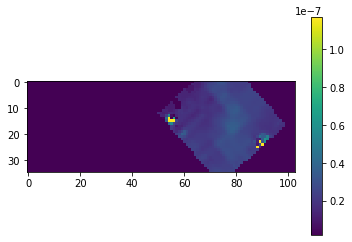

In [102]:
plt.imshow(m.data)
plt.colorbar()

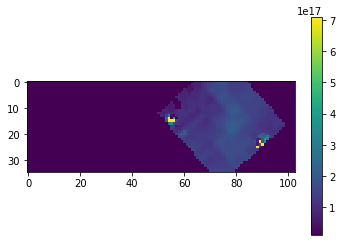

In [104]:
plt.imshow(nn.data)
plt.colorbar()